In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
from scipy import stats
import time

# set seaborn settings
sns.set()
plt.rcParams["patch.force_edgecolor"] = True # set lines
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings('ignore')

## import custom helper functions
import helpers as h

In [2]:
econ = pd.read_csv("data/Chicago_Socioeconomic.csv")

In [3]:
econ.head()

,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,1,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39
1,2,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46
2,3,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20
3,4,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17
4,5,North Center,0.3,7.5,5.2,4.5,26.2,57123,6


In [4]:
newEconColumns = ["CommunityAreaNumber", "CommunityAreaName", "PercentHousingCrowded", \
                  "PercentBelowPoverty", "PercentUnemployed", "PercentNoHsDiploma", "PercentUnder18OrOver64", \
                  "PercentCapitaIncome", "HardshipIndex"]

econ.columns = newEconColumns

econ.head()

,CommunityAreaNumber,CommunityAreaName,PercentHousingCrowded,PercentBelowPoverty,PercentUnemployed,PercentNoHsDiploma,PercentUnder18OrOver64,PercentCapitaIncome,HardshipIndex
0,1,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39
1,2,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46
2,3,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20
3,4,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17
4,5,North Center,0.3,7.5,5.2,4.5,26.2,57123,6


In [5]:
fallDf = pd.read_csv("data/2016/fall.csv")
winterDf = pd.read_csv("data/2016/winter.csv")
springDf = pd.read_csv("data/2016/spring.csv")
summerDf = pd.read_csv("data/2016/summer.csv")

In [6]:
# i don't wanna work on the entire dataset. 
# taking a fraction only.

fallFrac = fallDf.sample(frac = 0.10)
winterFrac = winterDf.sample(frac = 0.10)
springFrac = springDf.sample(frac = 0.10)
summerFrac = summerDf.sample(frac = 0.10)

In [7]:
fall = h.convertDataType(fallFrac)
winter = h.convertDataType(winterFrac)
spring = h.convertDataType(springFrac)
summer = h.convertDataType(summerFrac)

In [8]:
fall["season"] = "Fall"
winter["season"] = "Winter"
spring["season"] = "Spring"
summer["season"] = "Summer"


all = pd.DataFrame()
all = pd.concat([fall, winter, spring, summer])
print("Records:", len(all))

Records: 1987828


In [9]:
all.head()

,taxi_id,tolls,trip_start_timestamp,trip_end_timestamp,company,dropoff_centroid_longitude,dropoff_centroid_latitude,fare,payment_type,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_community_area,pickup_community_area,tips,trip_miles,trip_seconds,trip_total,season
1408493,3edf5aaee7cd5378f854cca9e574820e57badb93344e0c...,0.0,10/03/2016 11:30 PM,10/03/2016 11:30 PM,Choice Taxi Association,-87.620993,41.884987,5.25,Cash,41.890922,-87.618868,32.0,8.0,0.00,0.0,240.0,6.25,Fall
712019,5f688171bb38689b7df7d04a9677c3496f15c7d78561c2...,0.0,09/19/2016 04:15 PM,09/19/2016 04:30 PM,Dispatch Taxi Affiliation,-87.626659,41.907520,9.00,Credit Card,41.880994,-87.632746,8.0,32.0,1.00,2.0,660.0,10.00,Fall
2157815,bda723ff7d3238b616907b89512c7279801247b0658190...,0.0,10/19/2016 12:45 PM,10/19/2016 01:15 PM,NaN,NaN,NaN,33.00,Credit Card,NaN,NaN,NaN,NaN,9.38,12.5,1380.0,46.88,Fall
872154,4cd4a54e0f8a6c8430eadecaa39a991135644d861b33b5...,0.0,09/22/2016 04:45 PM,09/22/2016 04:45 PM,Blue Ribbon Taxi Association Inc.,-87.631717,41.914616,7.50,Credit Card,41.892042,-87.631864,7.0,8.0,1.00,0.1,360.0,8.50,Fall
168467,e3231f11a2e775788c4bcc58852ae4d4e3b2d78e8a2cb4...,0.0,09/04/2016 08:15 PM,09/04/2016 08:30 PM,Taxi Affiliation Services,-87.626215,41.892508,7.25,Cash,41.899156,-87.626211,8.0,8.0,0.00,1.0,600.0,8.25,Fall


Now I have sampled version of each seasons. I'd like to look through the earnings of each company throughout each season to see who earns more. For the sake of simplicity, I'll just look at the "trip_total" column for comparison. 

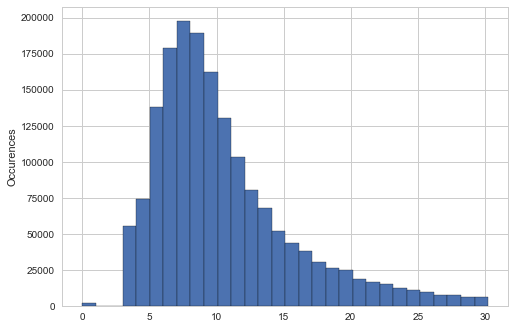

In [10]:
h.buildHistogram(all["trip_total"])

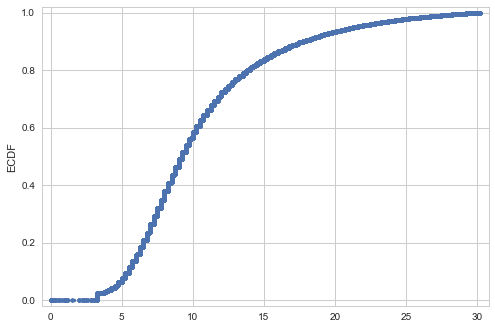

In [11]:
h.buildECDF(all["trip_total"])

In [12]:
all["trip_total"].describe()

count    1.987828e+06
mean     1.660998e+01
std      3.175184e+01
min      0.000000e+00
25%      7.350000e+00
50%      1.000000e+01
75%      1.650000e+01
max      9.997160e+03
Name: trip_total, dtype: float64

## Comparing seasonal earnings

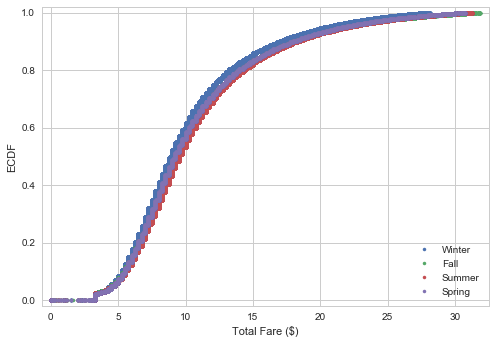

In [13]:
# Generate CDFs
x_winter, y_winter = h.getECDF(winter["trip_total"])
x_fall, y_fall = h.getECDF(fall["trip_total"])
x_summer, y_summer = h.getECDF(summer["trip_total"])
x_spring, y_spring = h.getECDF(spring["trip_total"])

# plot CDFs
_ = plt.plot(x_winter, y_winter, marker = ".", linestyle = "none")
_ = plt.plot(x_fall, y_fall, marker = ".", linestyle = "none")
_ = plt.plot(x_summer, y_summer, marker = ".", linestyle = "none")
_ = plt.plot(x_spring, y_spring, marker = ".", linestyle = "none")

# Make 2% margin
plt.margins(0.02)

# Make a legend and show the plot
_ = plt.legend(('Winter', 'Fall', 'Summer', 'Spring'), loc='lower right')

_ = plt.xlabel("Total Fare ($)")
_ = plt.ylabel("ECDF")
plt.show()

Summer may yield better earnings than Winter due to the good weather. People may want to go out more and take longer trips to farther places. 

In [14]:
winterEarnings = np.array(winter["trip_total"])
summerEarnings = np.array(summer["trip_total"])
springEarnings = np.array(spring["trip_total"])
fallEarnings = np.array(fall["trip_total"])

number_of_experiments = 10000

Are the earnings for the 2 seasons different? If they are identical, they should have the same mean earnings so the difference in the mean earnings should be zero. We'll choose the difference in mean as our test statistic. The P-Value tells you that the percentage of chance that you would get the difference of means observed in the experiment if the earnings yields are exactly the same. 

Let's test out this hypothesis. 

* H0 = There is no difference between Summer and Winter earnings.
* H1 = There is a difference between Summer and Winter earnings. 

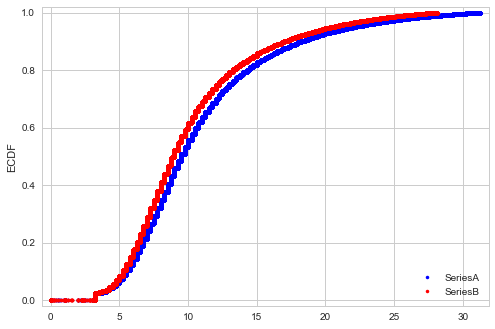

Empirical Difference in Means: 1.23645832881

H0 = No difference between the 2 distributions
H1 = There is a difference between the 2 distributions
P-Value: 0.0 | Reject H0


In [15]:
# compare summer and winter earnings
h.compareCDF(summer["trip_total"], winter["trip_total"])
h.identicalMeans(summerEarnings, winterEarnings, number_of_experiments)

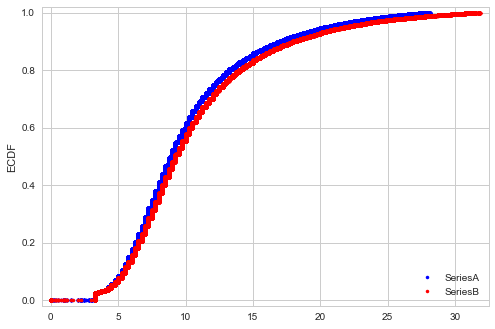

Empirical Difference in Means: -1.38180961667

H0 = No difference between the 2 distributions
H1 = There is a difference between the 2 distributions
P-Value: 0.0 | Reject H0


In [16]:
h.compareCDF(winter["trip_total"], fall["trip_total"])
h.identicalMeans(winterEarnings, fallEarnings, number_of_experiments)

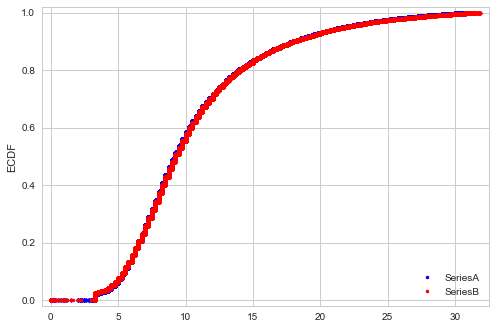

Empirical Difference in Means: -0.328448275183

H0 = No difference between the 2 distributions
H1 = There is a difference between the 2 distributions
P-Value: 0.0 | Reject H0


In [17]:
h.compareCDF(spring["trip_total"], fall["trip_total"])
h.identicalMeans(springEarnings, fallEarnings, number_of_experiments)

What about Fall and Summer?

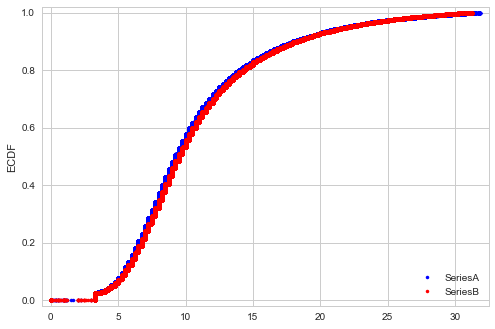

Empirical Difference in Means: 0.145351287859

H0 = No difference between the 2 distributions
H1 = There is a difference between the 2 distributions
P-Value: 0.0197 | Reject H0


In [18]:
h.compareCDF(fall["trip_total"], summer["trip_total"])
h.identicalMeans(fallEarnings, summerEarnings, number_of_experiments)

## Comparing taxi companies

Is there a real difference between first place and last place? If so, where do they pick up/drop off their passengers? To find out, I need obtain records with Pickup/Dropoff locations. Unfortunately, some companies do not publish their locations so we can only work with what we have. 

In [19]:
# drop trip records that do not have company name, pickup/dropoff locations
interestedTrips = all.dropna(subset = ["company", "pickup_community_area", \
                                       "dropoff_community_area"])

taxiCompanies = set(np.array(interestedTrips["company"]))
taxiCompanies = list(taxiCompanies)
print(taxiCompanies)

['1247 - 72807 Daniel Ayertey', '4623 - 27290 Jay Kim', '2092 - 61288 Sbeih company', '5074 - 54002 Ahzmi Inc', '3011 - 66308 JBL Cab Inc.', '2241 - 44667 - Felman Corp, Manuel Alonso', '5129 - 87128', '6743 - 78771 Luhak Corp', '2192 - 73487 Zeymane Corp', '3201 - C&D Cab Co Inc', '6488 - 83287 Zuha Taxi', '6574 - Babylon Express Inc.', 'Chicago Medallion Leasing INC', '3623 - 72222 Arrington Enterprises', '4197 - 41842 Royal Star', 'Top Cab Affiliation', 'Blue Ribbon Taxi Association Inc.', '2241 - 44667 Manuel Alonso', '0118 - 42111 Godfrey S.Awir', 'Patriot Trans Inc', '6747 - Mueen Abdalla', '5724 - 75306 KYVI Cab Inc', '3591 - 63480 Chuks Cab', '3620 - 52292 David K. Cab Corp.', '3141 - 87803 Zip Cab', 'Dispatch Taxi Affiliation', '5006 - 39261 Salifu Bawa', 'Suburban Dispatch LLC', '2733 - 74600 Benny Jona', 'KOAM Taxi Association', '2809 - 95474 C & D Cab Co Inc.', '4615 - 83503 Tyrone Henderson', '3152 - 97284 Crystal Abernathy', '1085 - 72312 N and W Cab Co', '6742 - 83735 Ta

In [20]:
meanEarnings = interestedTrips.groupby(["company"])["trip_total"] \
    .agg(["mean", "count"]).sort_values("mean", ascending = False).reset_index()

# I only care about Taxi companies that made at least 100 trips in 2016
meanEarnings = meanEarnings[meanEarnings["count"] >= 100].reset_index(drop = True)

meanEarnings

,company,mean,count
0,4053 - 40193 Adwar H. Nikola,27.094220,173
1,3620 - 52292 David K. Cab Corp.,24.195844,154
2,5074 - 54002 Ahzmi Inc,22.946358,302
3,5997 - 65283 AW Services Inc.,21.421606,193
4,5874 - 73628 Sergey Cab Corp.,18.818870,292
5,Patriot Trans Inc,18.753356,149
6,4623 - 27290 Jay Kim,18.752624,343
7,2733 - 74600 Benny Jona,18.724984,307
8,3623 - 72222 Arrington Enterprises,18.610075,266
9,6747 - Mueen Abdalla,18.142559,426


In [21]:
first = meanEarnings.head(1)["company"].iloc[0]
print("First:", first)

last = meanEarnings.tail(1)["company"].iloc[0]
print("Last:", last)

firstDf = interestedTrips[interestedTrips["company"] == first]
lastDf = interestedTrips[interestedTrips["company"] == last]

First: 4053 - 40193 Adwar H. Nikola
Last: Chicago Elite Cab Corp. (Chicago Carriag


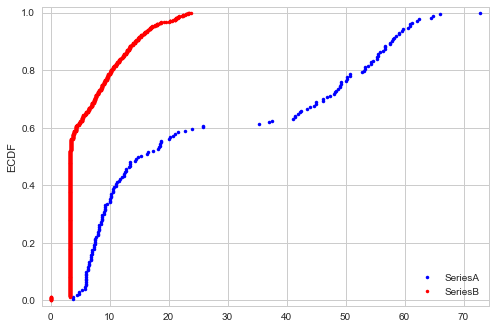

Empirical Difference in Means: 17.885879824652307

H0 = No difference between the 2 distributions
H1 = There is a difference between the 2 distributions
P-Value: 0.0 | Reject H0


In [22]:
h.compareCDF(firstDf["trip_total"], lastDf["trip_total"])

h.identicalMeans(firstDf["trip_total"], \
                 lastDf["trip_total"], \
                 number_of_experiments)

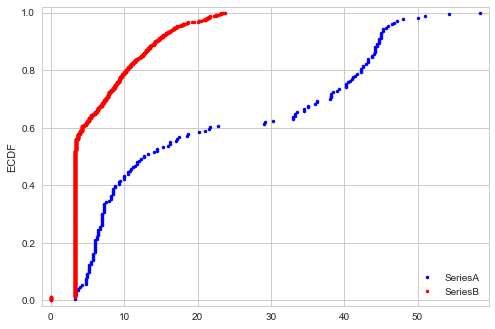

Empirical Difference in Means: 12.50524398650201

H0 = No difference between the 2 distributions
H1 = There is a difference between the 2 distributions
P-Value: 0.0 | Reject H0


In [23]:
h.compareCDF(firstDf["fare"], lastDf["fare"])
h.identicalMeans(firstDf["fare"], lastDf["fare"], number_of_experiments)

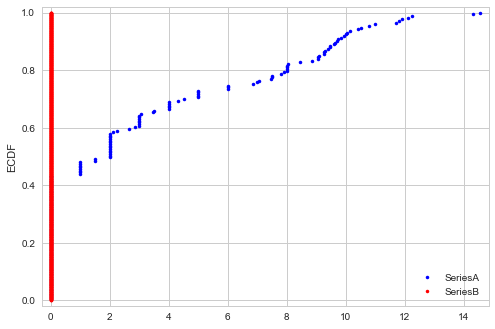

Empirical Difference in Means: 3.3141618497109815

H0 = No difference between the 2 distributions
H1 = There is a difference between the 2 distributions
P-Value: 0.0 | Reject H0


In [24]:
h.compareCDF(firstDf["tips"], lastDf["tips"])
h.identicalMeans(firstDf["tips"], lastDf["tips"], number_of_experiments)

### Joining socioeconomic data

In [25]:
interestedCompanies = np.array(meanEarnings["company"])

interestedDf = interestedTrips[interestedTrips["company"]\
                               .isin(interestedCompanies)]

print("Before Join:", len(interestedDf))

econ["CommunityAreaNumber"] = econ["CommunityAreaNumber"]\
    .astype("float").fillna(0.0)
    
interestedDf = pd.merge(interestedDf, econ, left_on = "pickup_community_area", \
                     right_on = "CommunityAreaNumber", how = "inner")

print("After Join:", len(interestedDf))

interestedDf.to_csv("data/2016/trip_socioeconomic_joined.csv", index = False)
interestedDf.head()

Before Join: 1056016
After Join: 1056016


,taxi_id,tolls,trip_start_timestamp,trip_end_timestamp,company,dropoff_centroid_longitude,dropoff_centroid_latitude,fare,payment_type,pickup_centroid_latitude,...,season,CommunityAreaNumber,CommunityAreaName,PercentHousingCrowded,PercentBelowPoverty,PercentUnemployed,PercentNoHsDiploma,PercentUnder18OrOver64,PercentCapitaIncome,HardshipIndex
0,3edf5aaee7cd5378f854cca9e574820e57badb93344e0c...,0.0,10/03/2016 11:30 PM,10/03/2016 11:30 PM,Choice Taxi Association,-87.620993,41.884987,5.25,Cash,41.890922,...,Fall,8.0,Near North Side,1.9,12.9,7.0,2.5,22.6,88669,1
1,4cd4a54e0f8a6c8430eadecaa39a991135644d861b33b5...,0.0,09/22/2016 04:45 PM,09/22/2016 04:45 PM,Blue Ribbon Taxi Association Inc.,-87.631717,41.914616,7.50,Credit Card,41.892042,...,Fall,8.0,Near North Side,1.9,12.9,7.0,2.5,22.6,88669,1
2,e3231f11a2e775788c4bcc58852ae4d4e3b2d78e8a2cb4...,0.0,09/04/2016 08:15 PM,09/04/2016 08:30 PM,Taxi Affiliation Services,-87.626215,41.892508,7.25,Cash,41.899156,...,Fall,8.0,Near North Side,1.9,12.9,7.0,2.5,22.6,88669,1
3,ea4e04b7158a5a8741d14d3434745e036c6c762bc385ce...,0.0,09/22/2016 12:30 PM,09/22/2016 12:30 PM,Dispatch Taxi Affiliation,-87.637844,41.893216,8.25,Cash,41.895033,...,Fall,8.0,Near North Side,1.9,12.9,7.0,2.5,22.6,88669,1
4,a6a1819f4bf52236cc6ae66ea913e96859b53c0e503b7a...,0.0,09/15/2016 04:15 PM,09/15/2016 04:30 PM,Dispatch Taxi Affiliation,-87.642649,41.879255,9.00,Credit Card,41.892508,...,Fall,8.0,Near North Side,1.9,12.9,7.0,2.5,22.6,88669,1
